In [25]:
import pandas as pd
import os
from DataLoad_Utils.TS_DataLoader import load_from_tsfile_to_dataframe
from DataLoad_Utils.My_Datautils import (Draw_Visiual_Multi_Feature_With_ZNormalization, Draw_Visiual_Multi_Feature, Draw_Visiual_Single_Feature_Each_Picture,
                                         load_UCR, remove_after_dot, Draw_Visiual_Single_Feature, plot_features_with_selector, read_tsf_file, CDF_Visual, CDF_Visual_Save,
                                         PDF_Visual, ACF_Visual, PACF_Visual, PSD_Visual, Hurst_Exponent_Visual)
from DataLoad_Utils.TSF_DataLoader import convert_tsf_to_dataframe, convert_tsf_to_dataframea_array
from DataLoad_Utils.TSF import TSF_Draw_Visiual_Single_Feature, TSF_Draw_Visiual_Single_Feature_Each_Picture, TSF_Draw_Visiual_Multi_Feature

In [44]:
data_dir = 'datasets/monash_datasets/australian_electricity_demand_dataset/australian_electricity_demand_dataset.tsf'
# data_dir = 'datasets/Monash_UEA_UCR_Regression_Archive/Covid3Month/Covid3Month_TEST.ts'
# data_dir = 'DiatomSizeReduction'
# data_dir = 'datasets/data/energy_data.csv'
# data_dir = 'datasets/data/Kaggle/DailyDelhiClimateTest.csv'
# data_dir = 'datasets/ETT-small/ETTh1.csv'
# data_dir = 'datasets/data/energydata_complete.csv'

In [45]:
# import argparse
#
# parser = argparse.ArgumentParser()
# parser.add_argument('--Save_OR_Not', default=True, type=bool, help='是否保存结果图')
# parser.add_argument('--cut_OR_Not', default=True, type=bool, help='是否对特征列超过30的数据进行截断')
# args = parser.parse_args(args=['--device', '0',  '--no_cuda'])
# print(args)

In [46]:
file_type = None
if '/' in data_dir:
    ## parameters
    file_name = os.path.basename(data_dir)
    result_dir,file_type = remove_after_dot(data_dir)   #截取文件夹路径和文件类型
else:
    file_name = data_dir
    result_dir = "UCR/" + file_name


parameters = dict()
parameters['Save_OR_Not'] = True    # 是否保存结果图
parameters['cut_OR_Not'] = True     # 是否对特征列过长的数据进行截断
parameters['cut_length'] = 30       # 截断长度
parameters['CDF_OR_Not'] = False    # 是否显示CDF图
parameters['file_name'] = file_name



In [47]:
if file_type == 'tsf':  # monash_datasets
    # df= read_tsf_file(data_dir)
    df,_, _, _, _  = convert_tsf_to_dataframea_array(data_dir)
    # df,_, _, _, _  = convert_tsf_to_dataframe(data_dir)
elif file_type == 'ts':     # TSER-Monash_UEA_UCR_Regression_Archive
    # 暂时还不能使用
    load_from_tsfile_to_dataframe(data_dir)
elif file_type == 'csv' or file_type == 'txt':
    df = pd.read_csv(data_dir)
elif '/' not in data_dir:
    df,_ = load_UCR(data_dir)
else:
    raise ValueError('Invalid file type')

json_dir = result_dir
# 保存图的路径
result_dir = 'Result/' + result_dir
print(result_dir)

Result/datasets/monash_datasets/australian_electricity_demand_dataset/australian_electricity_demand_dataset


In [48]:
# df=df.iloc[20000:, :2]
print(df.shape)
columns_list = df.columns.tolist()
print(len(columns_list))



(5, 4)
4


In [49]:
df
"""
series_name	state	start_timestamp	series_value
T1	NSW	2002-01-01	[5714.045004, 5360.189078, 5014.835118,4602.755516, 4285.179828,4074.8...]
T2	VIC	2002-01-01	[3535.867064,3383.499028,3655.527552,3510.446636,3294.697156,3111.8...]
T3	QUN	2002-01-01	[3382.041342,3288.315794,3172.329022,3020.312986,2918.082882, 2839.9...]
T4	SA	2002-01-01	[1191.078014, 1219.589472, 1119.173498, 1016.407248, 923.499578, 855.867...]
T5	TAS	2002-01-01	[315.915504,306.245864,305.762576,295.602196, 290.44707, 282.57759, 2...]

"""

'\nseries_name\tstate\tstart_timestamp\tseries_value\nT1\tNSW\t2002-01-01\t[5714.045004, 5360.189078, 5014.835118,4602.755516, 4285.179828,4074.8...]\nT2\tVIC\t2002-01-01\t[3535.867064,3383.499028,3655.527552,3510.446636,3294.697156,3111.8...]\nT3\tQUN\t2002-01-01\t[3382.041342,3288.315794,3172.329022,3020.312986,2918.082882, 2839.9...]\nT4\tSA\t2002-01-01\t[1191.078014, 1219.589472, 1119.173498, 1016.407248, 923.499578, 855.867...]\nT5\tTAS\t2002-01-01\t[315.915504,306.245864,305.762576,295.602196, 290.44707, 282.57759, 2...]\n\n'

In [50]:
from Data_CDF import analyze_dataset, save_analysis_to_json, analyze_dataset_tsf, analysis_to_excel

if file_type == 'tsf':
    # 执行分析
    tsf_analysis = analyze_dataset_tsf(df, file_name)
    analysis_to_excel(tsf_analysis,f"{result_dir+'/'+file_name}.xlsx")
    # 保存结果
    # save_analysis_to_json([tsf_analysis], f"JSON/{json_dir}.json")

elif file_type == 'csv' or file_type == 'txt':
    csv_analysis = analyze_dataset(df, file_name)
    analysis_to_excel(csv_analysis,f"{result_dir+'/'+file_name}.xlsx")
    # save_analysis_to_json([csv_analysis], f"JSON/{json_dir}.json")

elif '/' not in data_dir:
    UCR_analysis = analyze_dataset(df, file_name)
    analysis_to_excel(UCR_analysis,f"{result_dir+'/'+file_name}.xlsx")
    # save_analysis_to_json([UCR_analysis], f"JSON/{json_dir}.json")

Created directory: Result/datasets/monash_datasets/australian_electricity_demand_dataset/australian_electricity_demand_dataset


IndexError: At least one sheet must be visible

In [33]:
# from TSF_Visual import plot_time_series

# if file_type == 'tsf':
#     TSF_Draw_Visiual_Single_Feature(df, columns_list, parameters, result_dir)
# else:
#     Draw_Visiual_Single_Feature(df, columns_list, parameters, result_dir)



In [34]:

if file_type == 'tsf':
    TSF_Draw_Visiual_Single_Feature_Each_Picture(df, columns_list, parameters, result_dir)
else:
    Draw_Visiual_Single_Feature_Each_Picture(df, columns_list, parameters, result_dir)

date in columns_list


F:\PyCharmProgram\TSDataSet\My_Datautils.py:253: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


Saved: Result/datasets/data/Kaggle/DailyDelhiClimateTest/DailyDelhiClimateTest.csv_meantemp.png
Saved: Result/datasets/data/Kaggle/DailyDelhiClimateTest/DailyDelhiClimateTest.csv_humidity.png
Saved: Result/datasets/data/Kaggle/DailyDelhiClimateTest/DailyDelhiClimateTest.csv_wind_speed.png
Saved: Result/datasets/data/Kaggle/DailyDelhiClimateTest/DailyDelhiClimateTest.csv_meanpressure.png


F:\PyCharmProgram\TSDataSet\My_Datautils.py:344: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


图形已保存为: Result/datasets/data/Kaggle/DailyDelhiClimateTest/Draw_Visiual_Multi_Feature


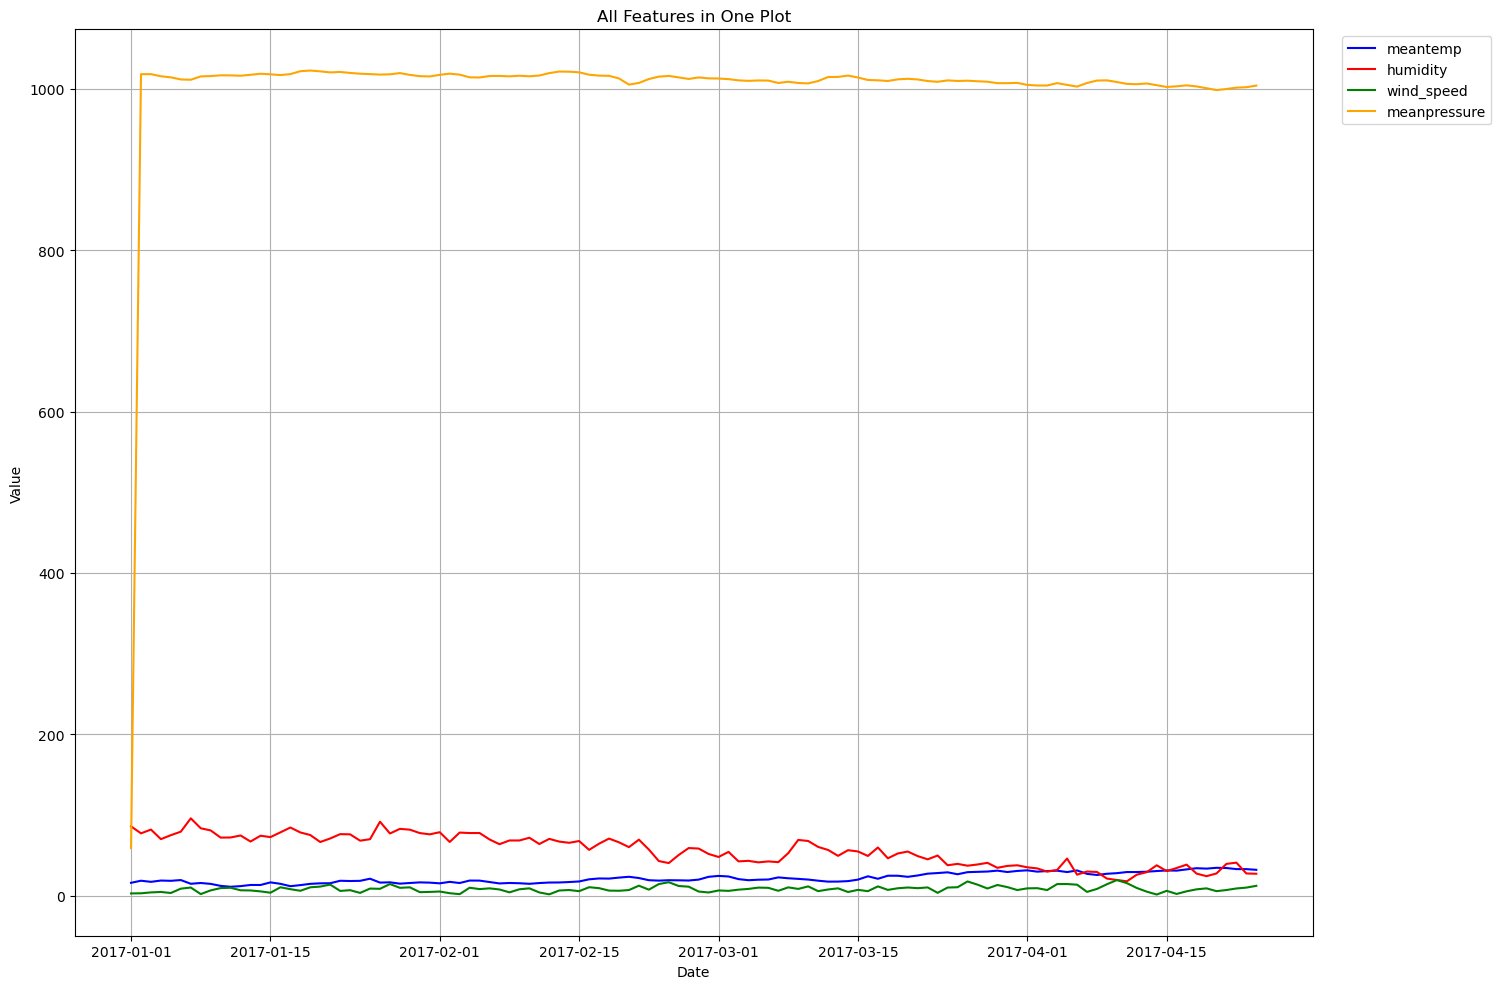

In [35]:
if file_type == 'tsf':
    TSF_Draw_Visiual_Multi_Feature(df, columns_list, parameters, file_name, result_dir)
else:
    Draw_Visiual_Multi_Feature(df, columns_list, parameters, result_dir)

In [36]:
# CDF_Visual(df, columns_list, parameters)
CDF_Visual_Save(df, columns_list, parameters, result_dir)

Saved CDF plot for meantemp to Result/datasets/data/Kaggle/DailyDelhiClimateTest/CDF_Plots\meantemp_CDF.png
Saved CDF plot for humidity to Result/datasets/data/Kaggle/DailyDelhiClimateTest/CDF_Plots\humidity_CDF.png
Saved CDF plot for wind_speed to Result/datasets/data/Kaggle/DailyDelhiClimateTest/CDF_Plots\wind_speed_CDF.png
Saved CDF plot for meanpressure to Result/datasets/data/Kaggle/DailyDelhiClimateTest/CDF_Plots\meanpressure_CDF.png


In [37]:
# PDF_Visual(df, columns_list, parameters)

In [38]:
# ACF_Visual(df, columns_list, parameters)

In [39]:
# PACF_Visual(df, columns_list, parameters)

In [40]:
# PSD_Visual(df, columns_list, parameters)

In [41]:
# Hurst_Exponent_Visual(df, columns_list, parameters)

In [42]:


# Draw_Visiual_Multi_Feature_With_ZNormalization(df, columns_list, parameters, result_dir)

In [43]:
# plot_features_with_selector(df, columns_list, Save_OR_Not, result_dir) #<---------
# # plot_features_with_selector(df, df.columns.tolist())
# # plot_features_horizontal_selector(df, df.columns.tolist())